# Introduction 

The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which National Park has the most sightings for endangered species in the last 7 days?
Data sources:

Both `Observations.csv` and `Species_info.csv` was provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

In [5]:
#import all the libararies we will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploratory Data Analysis
Data for this project was stored in two csv files `Observations.csv` and `species_info.csv` First, we will inspeculate the data sets, and find out more information about the data set in terms of
+ Columns (Variables) names
+ Data types of the variables
+ Basic statistical summary of the variables
+ Any null or missing value in the data set

### Load the data

#### observations
The `Observations.csv` contains information, the columns are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [50]:
#load Observations.csv and print the first 5 rows

Observation=pd.read_csv('Observations.csv')
Observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
Observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:
Observation.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000




#### Species
The `species_info.csv` contains information about different species in national park, the columns are:

- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [9]:
#load Observations.csv and print the first 5 rows

Species=pd.read_csv('species_info.csv')
Species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [10]:
Species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [11]:
Species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


The common column shared by two data sets is scientific_name, we can tell from the summary data, there are 5541 unique species in `observation.csv` as well as `species_info.csv`, this could be a good lead to link the two datasets together.

Two things about the `species_info.csv` file has drawn my attention:
- there are 5824 rows but only 5541 species, this indicates potential duplicates in the dataset
- the missing value in conservation_status is quite large, we will need to further assess the missing value types and whether this will impact our analysis

### Explore the data


We will look futher into the `conservation_status` among the species

In [12]:
Species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)


The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

Random sample some species where conservation status is `nan`, turns out the species are not in need for consevation, so we can treat the missing data in `conservation_status` as structural missing data, and it won't affect our analysis.

191 out of 5824 data points in `Species_info.csv` the `conservation_status` is not null. These will be the endangered species we will have our analysis focused on, the rest will change the `consevation_status` to `No Intervention`

In [13]:
Species.fillna('No Intervention',inplace=True)
Species_endangered=Species[Species['conservation_status']!='No Intervention']
Species_endangered.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,191,191,191,191
unique,7,179,190,4
top,Bird,Myotis lucifugus,"Gray Wolf, Wolf",Species of Concern
freq,79,3,2,161


In [14]:
df=Species_endangered.groupby('scientific_name').nunique()
print(df[df['common_names']>1])
print(df[df['conservation_status']>1])

                           category  common_names  conservation_status
scientific_name                                                       
Canis lupus                       1             2                    2
Eptesicus fuscus                  1             2                    1
Gavia immer                       1             2                    1
Lasionycteris noctivagans         1             2                    1
Myotis californicus               1             2                    1
Myotis lucifugus                  1             3                    1
Nycticorax nycticorax             1             2                    1
Pandion haliaetus                 1             2                    1
Riparia riparia                   1             2                    1
Taxidea taxus                     1             2                    1
                 category  common_names  conservation_status
scientific_name                                             
Canis lupus             1 

We have created a new dataset called `Species_endagered` in this dataset we can 191 rows, but only 171 scientific names, this is resulted from one species has multiple common_names. we only have one species: `Canis Iupus`that has changed `consevation_status`

In [15]:
Species_endangered[Species_endangered.scientific_name=='Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


We can tell that `Canis Iupus` was formally Endangered then in recovery but now Endangered again, since current status is endagered we can remove the duplicates in the `Species_endangered` dataset, and it won't affect our analysis

In [16]:
Species_endangered=Species_endangered.drop_duplicates(subset='scientific_name')

Species_endangered.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,179,179,179,179
unique,7,179,179,4
top,Bird,Canis latrans,Coyote,Species of Concern
freq,75,1,1,151


In [17]:
conservationCategory=pd.pivot_table(Species_endangered,values='scientific_name',
               index='conservation_status',
               columns='category',
              aggfunc='count')

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


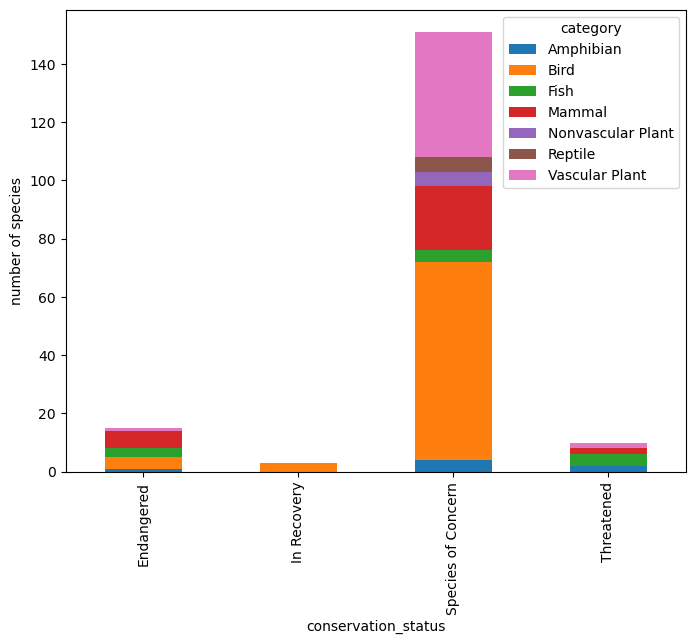

In [18]:
ax=conservationCategory.plot(kind='bar',figsize=(8,6),
                             ylabel='number of species',
                            stacked=True)

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`.

In [19]:
Species['is_protected']=Species.conservation_status != 'No Intervention'
Species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [20]:
CategoryCounts=pd.pivot_table(Species,
                       index='category',
                       columns='is_protected',
                       values='scientific_name',
                       aggfunc='count')
CategoryCounts.columns=[ 'not_protected', 'protected']
CategoryCounts

,not_protected,protected
category,,
Amphibian,73,7
Bird,442,79
Fish,116,11
Mammal,176,38
Nonvascular Plant,328,5
Reptile,74,5
Vascular Plant,4424,46


In [21]:
CategoryCounts['protected_perc']=CategoryCounts.protected/ \
                                    (CategoryCounts.not_protected+CategoryCounts.protected)*100
CategoryCounts

,not_protected,protected,protected_perc
category,,,
Amphibian,73,7,8.750000
Bird,442,79,15.163148
Fish,116,11,8.661417
Mammal,176,38,17.757009
Nonvascular Plant,328,5,1.501502
Reptile,74,5,6.329114
Vascular Plant,4424,46,1.029083


We can say that `Mammal` and `Bird` have the highest protected rate, with respect to 17% and 15%, but does this indicates statistical significance? We will use `chi2_contingency` method to test the null hypothesis that there's no difference in protected rate among all protected categories.


In [32]:
from scipy.stats import chi2_contingency
chi2,pval,dof,expected=chi2_contingency(CategoryCounts)

print(pval)

5.696796278902424e-156


 we have a p value of `5.696796278902424e-156` which is less than `0.05` we can reject the null hypothsis

### Spcies in parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days. In this analysis we will be focusing on the protected animal species


In [25]:
Observation_new=Observation.merge(Species_endangered, on='scientific_name', how='inner')
Observation_new.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
2,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
3,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
4,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern


In [40]:
Observation_new.groupby(['park_name','category']).observations.sum().reset_index()

,park_name,category,observations
0,Bryce National Park,Amphibian,498
1,Bryce National Park,Bird,6926
2,Bryce National Park,Fish,731
3,Bryce National Park,Mammal,3037
4,Bryce National Park,Nonvascular Plant,486
5,Bryce National Park,Reptile,387
6,Bryce National Park,Vascular Plant,4198
7,Great Smoky Mountains National Park,Amphibian,333
8,Great Smoky Mountains National Park,Bird,4741
9,Great Smoky Mountains National Park,Fish,547


Next let's use visualization to figure out which park has the largest sighting of endagered species by category


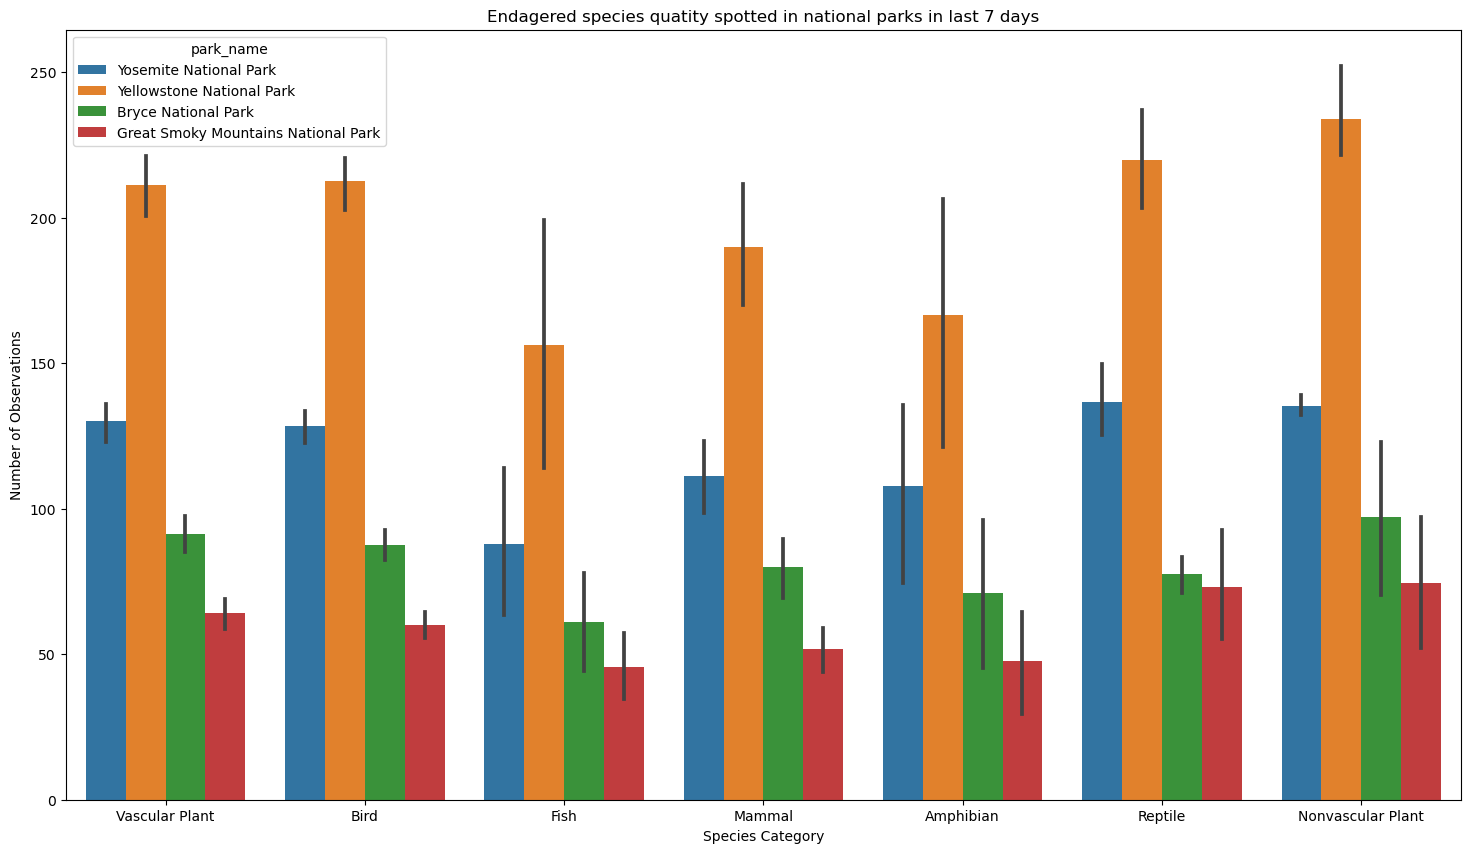

In [39]:
plt.figure(figsize=(18,10))
sns.barplot(data=Observation_new,x='category',y='observations',hue='park_name')
plt.title('Endagered species quantity spotted in national parks in last 7 days')
plt.xlabel('Species Category')
plt.ylabel('Number of Observations')
plt.show()


`YellowStone National Park` has the largest sighting for all endangered species categories in the last 7 days and `Great Smoky Mountains National Park` has the least sightings.


## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 179)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - Yes there's significant difference of conservation status among all species
- Which National Park has the most sightings for endangered species in the last 7 days?
    - Yellowstone national park has the most sightings
